In [1]:
from __future__ import print_function, division
import os
import torch
import torchvision
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
def get_train_data(datadir):
    train_transforms = transforms.Compose([transforms.Resize((224,224), interpolation=2),
                                           transforms.ToTensor(), 
                                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), 
                                          ])
    train_data = datasets.ImageFolder(datadir, transform= train_transforms)  
#     print(train_data)
    num_train = len(train_data)
#     print(num_train)
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True, num_workers=1)
    return trainloader

In [3]:
def get_test_data(datadir):
    test_transforms = transforms.Compose([transforms.Resize((224, 224), interpolation=2),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                         ])
    test_data = datasets.ImageFolder(datadir, transform= test_transforms)
    print(test_data)
    num_test = len(test_data)
    print(num_test)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True, num_workers=2)
    return testloader


In [4]:
trainloader = get_train_data('D:/Downloads/seg_train/seg_train')
# print(trainloader)

classes = ('buildings', 'forest', 'glacier', 'mountain', 'sea', 'street')
print(trainloader.dataset.classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [5]:
# for i, data in enumerate(trainloader, 0):
#     inputs, labels = data
#     #print(labels)

In [6]:
testloader = get_test_data('D:/Downloads/seg_test/seg_test')
# print(testloader)
#print(testloader.dataset.classes)

Dataset ImageFolder
    Number of datapoints: 3000
    Root Location: D:/Downloads/seg_test/seg_test
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None
3000


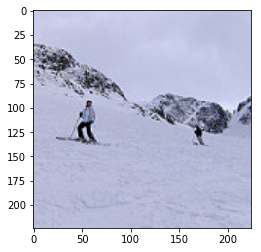

glacier


In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 5)
#         self.conv5 = nn.Conv2d(128, 64, 3)
        self.fc1 = nn.Linear(128*4*4, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 6)
#         self.fc4 = nn.Linear(900, 200)
#         self.fc5 = nn.Linear(200, 60)
#         self.fc6 = nn.Linear(60, 6)
        
    def forward(self, x):
#         print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
#         print(x.shape)
        x = F.relu(self.conv2(x))
#         print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
#         print(x.shape)
        x = self.pool(F.relu(self.conv4(x)))
#         print(x.shape)
#         x = self.pool(F.relu(self.conv5(x)))
#         print(x.shape)
        x = x.view(-1, 128*4*4)
#         print(x.shape)
        x = F.relu(self.fc1(x))
#         print(x.shape)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         x = F.relu(self.fc5(x))
#         x = self.fc6(x)
        return x
    
net = Net()
net.to(device)
        

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2048, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=6, bias=True)
)

In [10]:
# print(net)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [15]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
#         print('####bb##')
#         print(inputs.shape)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

ValueError: Expected input batch_size (36) to match target batch_size (1).

In [16]:
import torchvision.models as models

In [17]:
resnet18 = models.resnet18(pretrained = True)

In [18]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [19]:
for param in resnet18.parameters():
    param.requires_grad = False

In [20]:
resnet18.fc = nn.Sequential(nn.Linear(512, 256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256, 6),
                           nn.LogSoftmax(dim = 1))

In [21]:
resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [29]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(resnet18.parameters(), lr = 0.001, momentum = 0.9)
optimizer = optim.Adam(resnet18.parameters())

In [30]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
#         print('####bb##')
#         print(inputs.shape)
        optimizer.zero_grad()
        
        outputs = resnet18.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

PATH = 'C:/Users/tunes/Aandom/ayushaa/intel_resnet18_net.pth'
torch.save(resnet18.state_dict(), PATH)

[1,  2000] loss: 1.791
[1,  4000] loss: 1.792
[1,  6000] loss: 1.791
[1,  8000] loss: 1.792
[1, 10000] loss: 1.792
[1, 12000] loss: 1.792
[1, 14000] loss: 1.790
[2,  2000] loss: 1.792
[2,  4000] loss: 1.790
[2,  6000] loss: 1.793
[2,  8000] loss: 1.793
[2, 10000] loss: 1.790
[2, 12000] loss: 1.791
[2, 14000] loss: 1.792
Finished Training


In [24]:
# PATH = 'C:/Users/tunes/Aandom/ayushaa/intel_resnet18_net.pth'
# torch.save(resnet18.state_dict(), PATH)

In [31]:
resnet18.load_state_dict(torch.load(PATH))

In [32]:
correct = 0
total = 0

with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        inputs_test, labels_test = data[0].to(device), data[1].to(device)
        output_test = resnet18(inputs_test)
        _, predicted = torch.max(output_test.data, 1)
        total += labels_test.size(0)
        correct += (predicted == labels_test).sum().item()

print(len(inputs_test))
print(len(output_test))
print(len(predicted))
print(total)
print(correct)
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))      

1
1
1
3000
525
Accuracy of the network on the 10000 test images: 17 %
